## Importing  libraries

In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

##Loading California Housing dataset

In [4]:
# Download the data
X,y = fetch_california_housing(return_X_y=True)

## Split data into train and test sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=8)

##Preprocessing the dataset

Making the bargraphs to understand what kind of preprocessing needed to be done

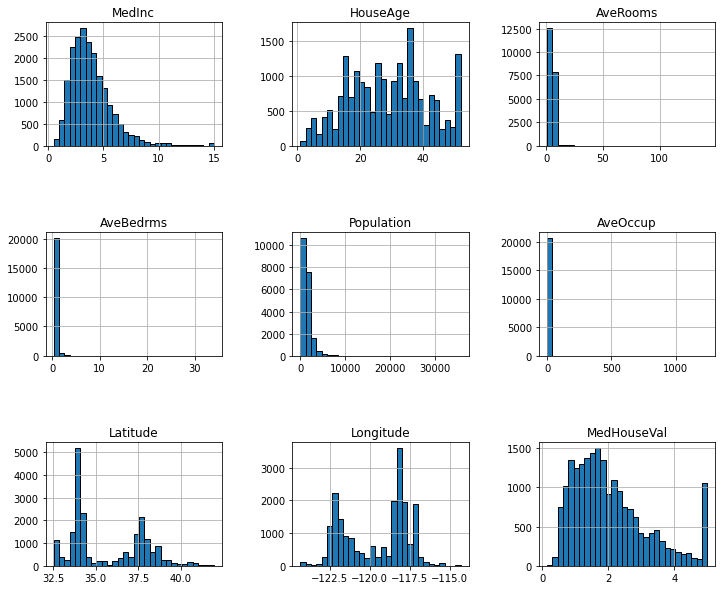

In [6]:
california_housing=fetch_california_housing(as_frame=True)
california_housing.frame.hist(figsize=(12,10),bins=30,edgecolor="black")
plt.subplots_adjust(hspace=0.7,wspace=0.4)

From the above distribution we can see that we need to apply the following preprocessing 

1.   **Feature Scaling**-Feature scaling is an essential step in algorithms like KNN because here we are dealing with metrics like euclidian distance which are dependent on the scale of the dataset.So for scaling we will use the StandardScaler function in sklearn





In [7]:
# Create pipeline with min-max scaler followed by 
# KNN regressor
pipe = Pipeline([('scaler', MinMaxScaler()), 
                 ('knn', KNeighborsRegressor(n_neighbors=2))])

#fitting and transform training data
pipe.fit(X_train,y_train)

#transform test data
y_pred = pipe.predict(X_test) 

# compute RMSE
error = mean_squared_error(y_test,y_pred, squared=False)
print(error)

0.6767822465759739




### Finding the best value of k through cross validation
In case of KNN the no. of neighbours is the hyperparameter that we have to tune it through cross validation

In [8]:
#to store rmse values for different k
rmse_val = [] 

for K in range(1,31):
    
  pipe = Pipeline([('scaler', MinMaxScaler()), 
                   ('knn', KNeighborsRegressor(n_neighbors=K))])
  
  #fit the model
  pipe.fit(X_train, y_train)  

  # make prediction on test set
  pred=pipe.predict(X_test) 
  
  # calculate rmse
  error = mean_squared_error(y_test,pred, squared=False)
  
  #store rmse values
  rmse_val.append(error) 

## Learning Curve

### Plotting RMSE vs K, curve to find best value of K 

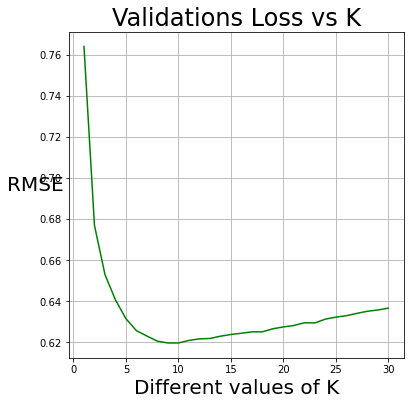

In [9]:
plt.figure(figsize=(6,6))

#plotting the rmse values against k values
plt.plot(range(1, len(rmse_val)+1), rmse_val, color='green') 
plt.xlabel('Different values of K', fontsize=20) 
plt.ylabel('RMSE', fontsize=20, rotation=0) 
plt.grid(True)
  
# displaying the title
plt.title("Validations Loss vs K", fontsize=24)
  
plt.show() 

In [10]:
# index=np.argmin(rmse_val)
print('Lowest rmse value comes when K is:{}'.format(np.argmin(rmse_val)+1))

Lowest rmse value comes when K is:9


# Performing Grid Search CV

In [12]:
k_range = list(range(1, 31))
params = dict(n_neighbors=k_range)
print(params)

reg_knn = KNeighborsRegressor()

#validate model with his parameters
gs = GridSearchCV(estimator=reg_knn, 
                  param_grid=params, 
                  cv=10, n_jobs=-1) 
gs.fit(X_train, y_train)

reg_knn = gs.best_estimator_
print(reg_knn) #printing best estimator values

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
KNeighborsRegressor(n_neighbors=8)


In [13]:
model = KNeighborsRegressor(n_neighbors=9)

model.fit(X_train, y_train)
pred=model.predict(X_test) #make prediction on test set
error = mean_squared_error(y_test,pred, squared=False)
print('RMSE value for k is: ' , error)

RMSE value for k is:  1.0638597215430543


# Performing Randomized search CV

In [14]:
reg_knn = KNeighborsRegressor()
param_grid = params
randSearchCV = RandomizedSearchCV(reg_knn, param_grid, cv=10)
randSearchCV.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29, 30]})

In [15]:
best_reg_knn = randSearchCV.best_estimator_

#best estimator using radomized search cv
print(best_reg_knn) 

KNeighborsRegressor(n_neighbors=9)


In [16]:
model = KNeighborsRegressor(n_neighbors=8)

model.fit(X_train, y_train)
pred=model.predict(X_test) #make prediction on test set
error = mean_squared_error(y_test,pred, squared=False)
print(f'RMSE value for k = {8} is: ' , error)

RMSE value for k = 8 is:  1.0629125376781874


# Polynomial Features
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [17]:
params = {'poly__degree':list(range(1,4)),
          'knn__n_neighbors': list(range(6, 12))}
print(params)

pipe = Pipeline(steps=[('poly', PolynomialFeatures()),
                       ('scaler', MinMaxScaler()),
                       ('knn', KNeighborsRegressor())])

#validate model with his parameters
gs = GridSearchCV(estimator=pipe, 
                  param_grid=params, 
                  cv=5, n_jobs=-1)

gs.fit(X_train, y_train)

reg_knn = gs.best_estimator_

# printing best estimator values
print(reg_knn) 

{'poly__degree': [1, 2, 3], 'knn__n_neighbors': [6, 7, 8, 9, 10, 11]}
Pipeline(steps=[('poly', PolynomialFeatures(degree=1)),
                ('scaler', MinMaxScaler()),
                ('knn', KNeighborsRegressor(n_neighbors=8))])
